# Module 2 Practice 3 - Perform a Generalized Estimating Equations analysis

In this lab we will practice running a GEE.  In this case, the dependent variable is nominal, and contains counts.  Recall from the lab that count data fall under the Poisson distribution, so we will use that, and we will assume an Exchangeable covariance structure.

Documentation for the data is [here](../resources/epil.html).

We will model the variable `y`, which are the counts of seizures occurring during each two week period.  We will use the following as the independent variables:

1. age
1. trt
1. base

The variable `subject` identifies the groups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install --upgrade "statsmodels>=0.11"

from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import Exchangeable,Independence,Autoregressive
from statsmodels.genmod.families import Poisson

Requirement already up-to-date: statsmodels>=0.11 in /opt/conda/lib/python3.7/site-packages (0.13.1)


In [2]:
data = pd.read_csv('../resources/epil.csv', index_col=0)
display(data.head())

,y,trt,base,age,V4,subject,period,lbase,lage
1,5,placebo,11,31,0,1,1,-0.756354,0.114204
2,3,placebo,11,31,0,1,2,-0.756354,0.114204
3,3,placebo,11,31,0,1,3,-0.756354,0.114204
4,3,placebo,11,31,1,1,4,-0.756354,0.114204
5,3,placebo,11,30,0,2,1,-0.756354,0.081414


## Data visualization
Create a scatter plot of the response variable `y` on the y axis, `period` on the x, and color by the variable `trt`

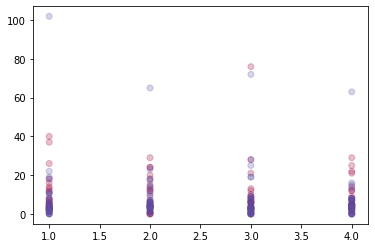

In [3]:
# your code here

data['trt'] = pd.Categorical(data['trt']) # creating a categorical from the strings gives us an easy way to refernce the values by text or by number

plt.scatter(data['period'], data['y'], c=data['trt'].cat.codes, alpha=0.25, cmap='Spectral')

Create a scatter plot of `y` versus `base`.

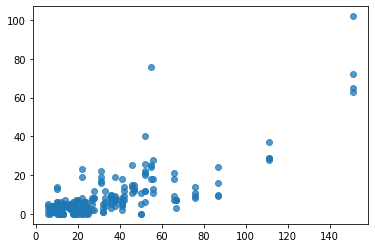

In [4]:
# your code here

plt.scatter(data['base'], data['y'], alpha=0.75)

## Perform a GEE model
See the introductory text for this practice exercise to help you decide which parameters you need.
Print the results summary, and the QIC for the model.


In [5]:
# your code here

model = GEE.from_formula('y ~ age + trt + base', 'subject', data, cov_struct= Exchangeable(), family=Poisson())
result = model.fit()
print(result.summary())
print(result.qic(result.scale))

                               GEE Regression Results                              
Dep. Variable:                           y   No. Observations:                  236
Model:                                 GEE   No. clusters:                       59
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                   4
Family:                            Poisson   Mean cluster size:                 4.0
Dependence structure:         Exchangeable   Num. iterations:                     2
Date:                     Tue, 25 Jan 2022   Scale:                           1.000
Covariance type:                    robust   Time:                         14:57:56
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5730      0.361      1.589      0.112      -0.134  

## Perform a GEE using a different correlation structure
Run the GEE model again using an Independence correlation structure. Print the results summary, and the QIC for the model.


In [6]:
# your code here

model = GEE.from_formula('y ~ age + trt + base', 'subject', data, cov_struct=Independence(), family=Poisson())
result = model.fit()
print(result.summary())
print(result.qic(result.scale))

                               GEE Regression Results                              
Dep. Variable:                           y   No. Observations:                  236
Model:                                 GEE   No. clusters:                       59
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                   4
Family:                            Poisson   Mean cluster size:                 4.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Tue, 25 Jan 2022   Scale:                           1.000
Covariance type:                    robust   Time:                         14:58:07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5730      0.361      1.589      0.112      -0.134  

## Interpretation
Interpret the results.  

Which model is better (Exchangeable or Independence)?

In the better model, which features are significate at $\alpha$ = 0.05?

Of the significant features, are their effects positive or negative?

Describe the effects in natural language.

Your interpretation here

The models are effectively equal. 

The significant features are:
  * age
  * base
  
The effects for age and base are both positive.  For each unit increase in age and base, there is an increase in the predicted count of siezures.

Subjects with a higher number of seizures at the baseline are more likely to have increased seizure counts.  As subjects age, they are also more likely to have increased seizure counts.
